### 3.6 House price predict : regression problem

#### 3.6.1 boston house price dataset

In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets)= boston_housing.load_data()

print("Train data : ",train_data.shape)
print("Test data : ",test_data.shape)

Train data :  (404, 13)
Test data :  (102, 13)


In [2]:
# Normalize data
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std
test_data-=mean
test_data/=std

#### 3.6.3 Model configuration

In [3]:
from keras import models
from keras import layers
import tensorflow as tf

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=[tf.keras.metrics.MeanAbsoluteError()])
    return model

In [4]:
import numpy as np

k=4 
num_val_samples=len(train_data)//k
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('Processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [5]:
average_mae_history=[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

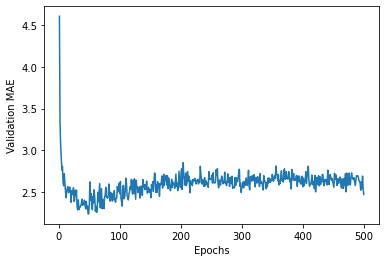

In [6]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history)+1), average_mae_history)

plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()